In [61]:
from resources import db_connect
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from scipy import stats
%matplotlib inline

In [62]:
main = db_connect('main')
MthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [63]:
Transactions_D = pd.read_sql('select * from mint.inter_budget_discretionary_model'
                             , con=main.conn
                             , parse_dates=['trans_date']
                             , index_col='trans_date')

In [64]:
Monthly = pd.DataFrame(Transactions_D.resample('M')['amount'].sum())

Mu = Monthly.amount.mean()
Sigma = np.std(Monthly['amount'])

In [65]:
Monthly['Z_Score'] = stats.zscore(Monthly['amount'])
Monthly['Target'] = Monthly['Z_Score'] < 0

In [66]:
print('Discretionary Monthly Total Mean: {}\nDiscretionary Monthly Total StandardDev:{}'.format(Mu, Sigma))
print(Monthly['Target'].value_counts())

Discretionary Monthly Total Mean: 2247.5050000000015
Discretionary Monthly Total StandardDev:649.9196580350825
True     61
False    53
Name: Target, dtype: int64


Text(0.5, 1.0, 'Monthly Spending Z Scores')

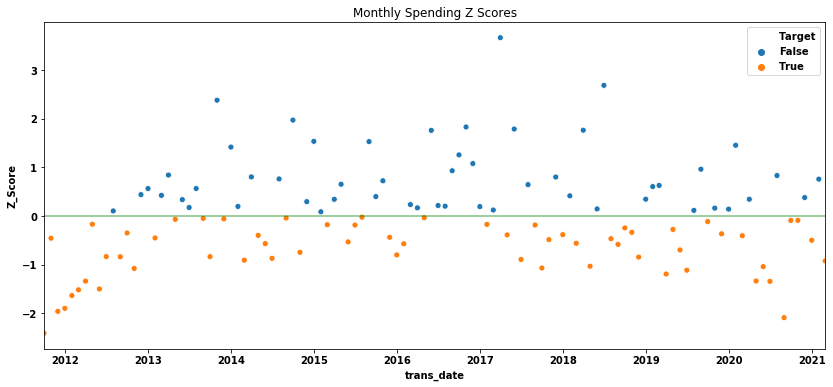

In [67]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[14, 6])

sns.scatterplot(x=Monthly.index, y='Z_Score', data=Monthly, ax=ax1, hue='Target')
sns.lineplot(x=Monthly.index, y=0, data=Monthly, ax=ax1, alpha=.5, color='Green')

ax1.set_xlim(Monthly.index.min(), Monthly.index.max())
ax1.set_title('Monthly Spending Z Scores')


In [72]:
(Monthly.index.min() - relativedelta(months=1))
(Monthly.index.max() + relativedelta(months=1))



ax1.set_ylim((Monthly.index.min() - relativedelta(months=1)), (Monthly.index.max() + relativedelta(months=1)))

Timestamp('2011-08-30 00:00:00', freq='M')

In [80]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


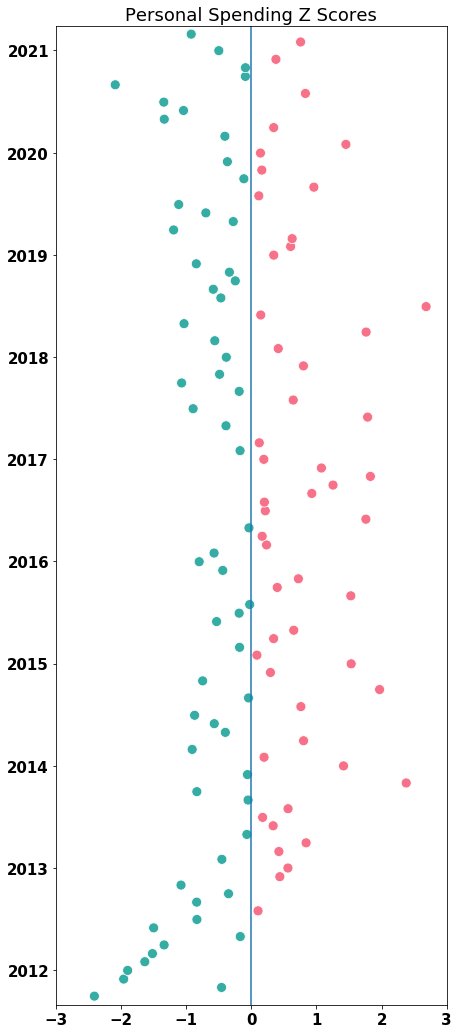

In [81]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[7, 16])

sns.scatterplot(y=Monthly.index, x='Z_Score', data=Monthly, ax=ax1, hue='Target',palette = 'husl',legend=False,s=100)
# sns.lineplot(y=Monthly.index, x=int(0), data=Monthly, ax=ax1, alpha=.5, color='Green')
plt.axvline(x=0)


ax1.set_ylim((Monthly.index.min() - relativedelta(months=1)), (Monthly.index.max() + relativedelta(months=1)))
ax1.set_xlim(-3, 3)

y_axis = ax1.axes.get_yaxis()
y_axis.set_label_text('foo')
y_label = y_axis.get_label()
y_label.set_visible(False)


x_axis = ax1.axes.get_xaxis()
x_axis.set_label_text('foo')
x_label = x_axis.get_label()
x_label.set_visible(False)

# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"


ax1.set_title('Personal Spending Z Scores')

plt.savefig('./Images/Resume_Z_{}.png'.format(datetime.now().strftime("%Y%m%d")), dpi=300, bbox_inches='tight')

